# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir(r'/content/drive/My Drive/Colab Notebooks/')

# Load Dataset

In [4]:
# melakukan load dari csv ke dalam bentuk pandas dataframe
df=pd.read_csv('glass.csv')

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Data Description dan analisa

In [6]:
# melihat tipe dari tiap kolom di dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# melihat persebaran data dari setiap kolom, seperti variance dan std
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
# melihat jumlah missing value
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
# melihat data yang memiliki missing value
df[df.isna().any(axis=1)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [10]:
# cek duplikat
df.duplicated().any()

True

In [11]:
# melihat jumlah ketika ada duplicate value
df.shape

(214, 10)

In [12]:
# menghapus duplicate value lalu menampilkan jumlah akhir
dfd = df.copy()
dfd.drop_duplicates(inplace=True)
dfd.shape

(213, 10)

In [13]:
# melihat jumlah setiap kelas di kolom target
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [14]:
labels=['building-windows-float-processed','building=windows-nonfloat-processed', 'vehicle-windows-float-processed', 'vehicle-windows-nonfloat-processed', 'containers', 'tableware', 'headlamps']

In [15]:
# distribusi data dari satu kolom ke kolom yang lain
#sns.pairplot(df,hue="Type")

# PraProses


`Ini kalian bisa melakukan pra proses menyesuaikan kondisi data.
Beberapa masalah yang harus diatasi:
Missing Value
Extreme Value (outlier)
Encoding atribut kateogrikal
Normalisasi
Feature engineering
dll.
Intinya menyesuaikan problem!`

## Handling Missing Value

In [16]:
df.mean()

RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

In [17]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df.fillna(df.mean(),inplace=True)

In [18]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [19]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Train Test Split


In [20]:
# X adalah kolom attribut tanpa kolom target
X=df.iloc[:, :-1]
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [21]:
# y adalah kolom yang hanya target
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [22]:
# untuk memisahkan data train dan test -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# param stratify : data displit secara stratified -> https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y) 

# Normalisasi

In [23]:
# untuk mengatasi perbedaan nilai antar kolom -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #tanpa target
X_test_scaled = scaler.transform(X_test)

# Evaluation

In [24]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

# Model

In [25]:
kolom=['Model','Acc','Precision','Recall','F1']
HASIL_AKHIR=pd.DataFrame(columns=kolom)

# Training Model

## Random Forest

### Random Forest Gini

In [26]:
# fit model Random Forest -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
rf.fit(X_train, y_train)
# predict model ke data test
y_pred_rf=rf.predict(X_test)
# evaluation score untuk model Random Forest


In [27]:

hasil=['RF Gini Tanpa Parameter']+get_metrics(y_test,y_pred_rf)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])


['RF Gini Tanpa Parameter', 0.8308, 0.8487, 0.8308, 0.8253]


### Random Forest Entropy

In [28]:

# fit model Random Forest -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)
# predict model ke data test
y_pred_rf=rf.predict(X_test)
# evaluation score untuk model Random Forest

hasil=['RF entropy Tanpa Parameter']+get_metrics(y_test,y_pred_rf)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

['RF entropy Tanpa Parameter', 0.8154, 0.8205, 0.8154, 0.8101]


## XGBoost

In [29]:
# run di local -> pip install xgboost

# fit model XGBoost -> https://xgboost.readthedocs.io/en/latest/
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# predict model ke data test
y_pred_xgb=xgb.predict(X_test)
# evaluation score untuk model XGBoost
get_metrics(y_test,y_pred_xgb)
hasil=['XGB tanpa param']+get_metrics(y_test,y_pred_xgb)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## MLP

In [30]:
# fit model MLP -> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
# predict model ke data test
y_pred_mlp=mlp.predict(X_test)
get_metrics(y_test,y_pred_mlp)
hasil = ['mlp tanpa Param'] + get_metrics(y_test,y_pred_mlp)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

### Decision Tree Gini

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
# predict model ke data test
y_pred_dt=dt.predict(X_test)
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

hasil = ['DT Gini tanpa param'] + get_metrics(y_test,y_pred_dt)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

### Decision Tree Entropy

In [32]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
# predict model ke data test
y_pred_dt=dt.predict(X_test)
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

hasil = ['DT entropy tanpa param'] + get_metrics(y_test,y_pred_dt)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Random Forest

### RF Gini

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=6,n_estimators=51,criterion='gini')
rf.fit(X_train, y_train)
# predict model ke data test
y_pred_rf=rf.predict(X_test)
# evaluation score untuk model Random Forest

hasil=['RF Gini']+get_metrics(y_test,y_pred_rf)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

['RF Gini', 0.8769, 0.8972, 0.8769, 0.8714]


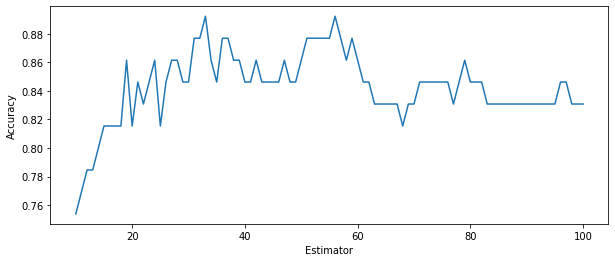

In [34]:
import matplotlib.pyplot as plt  
acc = []
random = range(10, 101)

for i in random:
    rf = RandomForestClassifier(random_state=6,n_estimators=i)
    rf.fit(X_train, y_train)

    # predict model ke data test
    y_pred_rf=rf.predict(X_test)

    # evaluation score untuk model Random Forest
    acc.append(get_metrics(y_test,y_pred_rf)[0])

plt.subplots(figsize = (10, 4))
plt.plot(random, acc)
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.show()

### RF Entropy

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=50,criterion='entropy')
rf.fit(X_train, y_train)
# predict model ke data test
y_pred_rf=rf.predict(X_test)
# evaluation score untuk model Random Forest
hasil = ['RF Entropy']+  get_metrics(y_test,y_pred_rf)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

['RF Entropy', 0.8769, 0.8964, 0.8769, 0.8711]


## XGBoost

In [36]:
# run di local -> pip install xgboost

# fit model XGBoost -> https://xgboost.readthedocs.io/en/latest/
from xgboost import XGBClassifier

booster = ['gbtree', 'gblinear', 'dart']
nolsatu = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# print("est   acc   pre   rec   F1")
# for i in nolsatu:
xgb = XGBClassifier(learning_rate=0.9)
xgb.fit(X_train, y_train)

# predict model ke data test    
y_pred_xgb=xgb.predict(X_test)

# evaluation score untuk model XGBoost
# print(i, get_metrics(y_test,y_pred_xgb))
get_metrics(y_test,y_pred_xgb)

[0.8462, 0.8625, 0.8462, 0.8392]

In [37]:
hasil=['XGB']+get_metrics(y_test,y_pred_xgb)

In [38]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


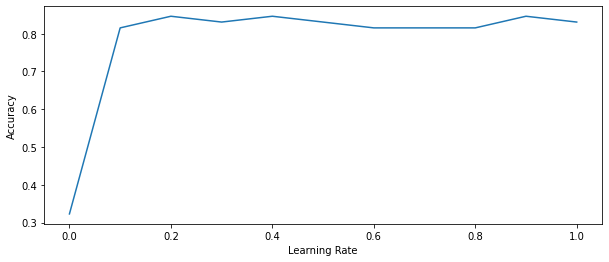

In [39]:
acc = []
nolsatu = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i in nolsatu:
    xgb = XGBClassifier(learning_rate=i)
    xgb.fit(X_train, y_train)

    # predict model ke data test    
    y_pred_xgb=xgb.predict(X_test)

    # evaluation score untuk model XGBoost
    # print(i, get_metrics(y_test,y_pred_xgb))
    # get_metrics(y_test,y_pred_xgb)
    acc.append(get_metrics(y_test,y_pred_xgb)[0])

plt.subplots(figsize = (10, 4))
plt.plot(nolsatu, acc)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

## MLP

In [40]:
# fit model MLP -> https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=700, random_state=191)
mlp.fit(X_train, y_train)
# predict model ke data test
y_pred_mlp=mlp.predict(X_test)
get_metrics(y_test,y_pred_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.7846, 0.7364, 0.7846, 0.7553]

In [41]:
hasil = ['mlp'] + get_metrics(y_test,y_pred_mlp)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

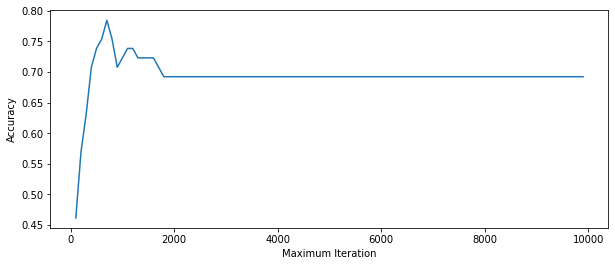

In [42]:
acc = []
itera = range(100, 10000, 100)
for i in itera:
    mlp = MLPClassifier(max_iter=i, random_state=191)
    mlp.fit(X_train, y_train)

    # predict model ke data test
    y_pred_mlp=mlp.predict(X_test)

    # evaluation score untuk model MLP
    # print(i, get_metrics(y_test,y_pred_mlp))
    get_metrics(y_test,y_pred_mlp)
    acc.append(get_metrics(y_test,y_pred_mlp)[0])

plt.subplots(figsize = (10, 4))
plt.plot(itera, acc)
plt.xlabel('Maximum Iteration')
plt.ylabel('Accuracy')
plt.show()

## Decision Tree

### DT Gini

In [43]:
# fit model Decision Tree -> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=34)
dt.fit(X_train, y_train)
# predict model ke data test
y_pred_dt=dt.predict(X_test)
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

hasil=['DT Gini'] + get_metrics(y_test,y_pred_dt)

HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

### DT Entropy

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=73,criterion='entropy')
dt.fit(X_train, y_train)
# predict model ke data test
y_pred_dt=dt.predict(X_test)
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

hasil = ['DT entropy'] + get_metrics(y_test,y_pred_dt)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

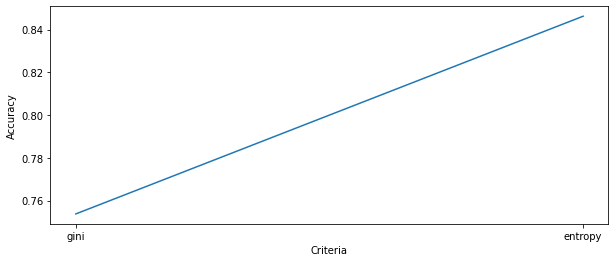

In [45]:
acc = []
criteria = ['gini', 'entropy']
for i in criteria:
    dt = DecisionTreeClassifier(random_state=73, criterion=i)
    dt.fit(X_train, y_train)

    # predict model ke data test
    y_pred_dt=dt.predict(X_test)

    # evaluation score untuk model Decision Tree
    # print(i, get_metrics(y_test,y_pred_dt))
    
    acc.append(get_metrics(y_test,y_pred_dt)[0])

plt.subplots(figsize = (10, 4))
plt.plot(criteria, acc)
plt.xlabel('Criteria')
plt.ylabel('Accuracy')
plt.show()

## Hasil Akhir

In [46]:
# dataframe perbandingan model
from IPython.display import display 
print("Feinard - 05111840000081 - KELAS KK E")
print("R. Dafa Berlian Denmar - 05111840000149 - KELAS KK E")
display(HASIL_AKHIR)
print("Hasil terbaik didapatkan dari model dengan XGB dan RF karena memiliki akurasi, presisi, recall, dan skor F1 tertinggi diantara semua model")

Feinard - 05111840000081 - KELAS KK E
R. Dafa Berlian Denmar - 05111840000149 - KELAS KK E


,Model,Acc,Precision,Recall,F1
0,RF Gini Tanpa Parameter,0.8308,0.8487,0.8308,0.8253
0,RF entropy Tanpa Parameter,0.8154,0.8205,0.8154,0.8101
0,XGB tanpa param,0.8154,0.8308,0.8154,0.8083
0,mlp tanpa Param,0.3385,0.1216,0.3385,0.1790
0,DT Gini tanpa param,0.7538,0.7779,0.7538,0.7570
0,DT entropy tanpa param,0.7692,0.7902,0.7692,0.7746
0,RF Gini,0.8769,0.8972,0.8769,0.8714
0,RF Entropy,0.8769,0.8964,0.8769,0.8711
0,XGB,0.8462,0.8625,0.8462,0.8392
0,mlp,0.7846,0.7364,0.7846,0.7553


Hasil terbaik didapatkan dari model dengan XGB dan RF karena memiliki akurasi, presisi, recall, dan skor F1 tertinggi diantara semua model


# CrossVal

### CV RF

In [178]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate

kolomwaktu = ['model', 'min waktu train', "min waktu test", "max nilai tes", "mean nilai tes"]
bandingWaktu = pd.DataFrame(columns=kolomwaktu)

X_scaled=StandardScaler().fit_transform(X)
rf_cv = RandomForestClassifier()
cv_results = cross_validate(rf_cv, X_scaled , y, cv=10)
cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.15617251, 0.15046787, 0.15138221, 0.17254114, 0.14722228,
        0.14528942, 0.1576376 , 0.15230799, 0.15354013, 0.14609313]),
 'score_time': array([0.01028943, 0.00844097, 0.00807095, 0.00802088, 0.00803304,
        0.00804639, 0.0081265 , 0.00800323, 0.00797057, 0.00808334]),
 'test_score': array([0.68181818, 0.72727273, 0.81818182, 0.72727273, 0.71428571,
        0.9047619 , 0.9047619 , 0.47619048, 0.76190476, 0.80952381])}

In [179]:
cv_results['test_score'].mean()

0.7525974025974026

In [180]:
cv_results['test_score'].max()

0.9047619047619048

In [181]:
cv_results['fit_time'].min()

0.14528942108154297

In [182]:
res = ['RF'] + [cv_results['fit_time'].min()] + [cv_results['score_time'].min()] + [cv_results['test_score'].max()] + [cv_results['test_score'].mean()]
bandingWaktu=pd.concat([bandingWaktu,pd.DataFrame([res],columns=kolomwaktu)])

### CV DT

In [183]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
dt_cv = DecisionTreeClassifier()
cv_results = cross_validate(dt_cv, X_scaled , y, cv=10)
cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.00230885, 0.00231242, 0.00287461, 0.00293136, 0.00267148,
        0.00257277, 0.0019958 , 0.001477  , 0.00144935, 0.00149465]),
 'score_time': array([0.00067019, 0.00077629, 0.00065756, 0.00103402, 0.00062895,
        0.000633  , 0.00040674, 0.00037646, 0.0003674 , 0.00042295]),
 'test_score': array([0.59090909, 0.63636364, 0.68181818, 0.63636364, 0.61904762,
        0.80952381, 0.80952381, 0.23809524, 0.61904762, 0.52380952])}

In [184]:
cv_results['test_score'].mean()

0.6164502164502164

In [185]:
cv_results['test_score'].max()

0.8095238095238095

In [186]:
cv_results['fit_time'].min()

0.0014493465423583984

In [187]:
res = ['DT'] + [cv_results['fit_time'].min()] + [cv_results['score_time'].min()] + [cv_results['test_score'].max()] + [cv_results['test_score'].mean()]
bandingWaktu=pd.concat([bandingWaktu,pd.DataFrame([res],columns=kolomwaktu)])

### CV MLP

In [188]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
mlp_cv = MLPClassifier()
cv_results = cross_validate(mlp_cv, X_scaled , y, cv=10)
cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist

{'fit_time': array([0.20601964, 0.18854165, 0.20386457, 0.19922519, 0.19923019,
        0.20378447, 0.19172788, 0.1974082 , 0.1975503 , 0.20920134]),
 'score_time': array([0.00134397, 0.00097418, 0.00138879, 0.00166726, 0.00123882,
        0.001544  , 0.00113869, 0.00094676, 0.00067234, 0.00074601]),
 'test_score': array([0.63636364, 0.72727273, 0.81818182, 0.72727273, 0.57142857,
        0.57142857, 0.76190476, 0.76190476, 0.66666667, 0.71428571])}

In [189]:
cv_results['test_score'].mean()

0.6956709956709958

In [190]:
cv_results['test_score'].max()

0.8181818181818182

In [191]:
cv_results['fit_time'].min()

0.18854165077209473

In [192]:
res = ['MLP'] + [cv_results['fit_time'].min()] + [cv_results['score_time'].min()] + [cv_results['test_score'].max()] + [cv_results['test_score'].mean()]
bandingWaktu=pd.concat([bandingWaktu,pd.DataFrame([res],columns=kolomwaktu)])

### CV XGBoost

In [193]:
X_scaled=StandardScaler().fit_transform(X)
xgb_cv = XGBClassifier()
cv_results = cross_validate(xgb_cv, X_scaled , y, cv=10)
cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'fit_time': array([0.1079874 , 0.09685135, 0.09070373, 0.08953214, 0.08871412,
        0.09600425, 0.08941102, 0.09182024, 0.10053945, 0.0935955 ]),
 'score_time': array([0.00121832, 0.00125289, 0.00129843, 0.00123668, 0.00116587,
        0.00117612, 0.00120687, 0.00123096, 0.00128794, 0.0012219 ]),
 'test_score': array([0.63636364, 0.72727273, 0.72727273, 0.72727273, 0.71428571,
        0.80952381, 0.80952381, 0.33333333, 0.76190476, 0.76190476])}

In [194]:
cv_results['test_score'].mean()

0.7008658008658009

In [195]:
cv_results['test_score'].max()

0.8095238095238095

In [196]:
cv_results['fit_time'].min()

0.0887141227722168

In [197]:
res = ['XGB'] + [cv_results['fit_time'].min()] + [cv_results['score_time'].min()] + [cv_results['test_score'].max()] + [cv_results['test_score'].mean()]
bandingWaktu=pd.concat([bandingWaktu,pd.DataFrame([res],columns=kolomwaktu)])

In [198]:
display(bandingWaktu)

,model,min waktu train,min waktu test,max nilai tes,mean nilai tes
0,RF,0.145289,0.007971,0.904762,0.752597
0,DT,0.001449,0.000367,0.809524,0.616450
0,MLP,0.188542,0.000672,0.818182,0.695671
0,XGB,0.088714,0.001166,0.809524,0.700866


# Grid Search

In [68]:
###### berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

### Grid Search Random Forest

In [69]:
# parameter yang ingin diujicoba
param_grid = {
    'n_estimators': [10, 100, 200, 300],
    'random_state': [0, 42, 21, 195, 214, 77, 50],
    'criterion': ['gini','entropy'],
    'max_features': ['auto','sqrt'],
}

In [70]:
# inisiasi model
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid ,cv=5)

In [71]:
# melakukan fit gridsearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [72]:
# parameter grid search terbaik
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 200,
 'random_state': 42}

In [73]:
grid_search.best_score_

0.7919540229885058

In [74]:
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)
# predict model ke data test
y_pred_rf=rf.predict(X_test)
# evaluation score untuk model Random Forest

hasil=['RF Grid Search']+get_metrics(y_test,y_pred_rf)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

['RF Grid Search', 0.8308, 0.8487, 0.8308, 0.8253]


### Grid Search DecisionTree

In [75]:
# parameter yang ingin diujicoba
param_grid = {
    'splitter': ['best','random'],
    'random_state': [0, 21, 42, 34, 73, 77, 50, 195, 214, 63],
    'criterion': ['gini','entropy'],
    'max_depth': [100,500,1000]
}

In [76]:
# inisiasi model
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid ,cv=5)

In [77]:
# melakukan fit gridsearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [78]:
# parameter grid search terbaik
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 100, 'random_state': 34, 'splitter': 'best'}

In [79]:
grid_search.best_score_

0.7050574712643678

In [80]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=34, splitter='best')

In [81]:
dt = grid_search.best_estimator_

In [82]:
dt.fit(X_train, y_train)
# predict model ke data test
y_pred_dt=dt.predict(X_test)
# evaluation score untuk model Random Forest

hasil=['DT Grid Search']+get_metrics(y_test,y_pred_dt)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

['DT Grid Search', 0.8, 0.8156, 0.8, 0.8013]


### Grid search MLP

In [83]:
# parameter yang ingin diujicoba
param_grid = {
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive'],
    'max_iter': [100, 200, 500, 1000],
}

In [84]:
# inisiasi model
clf = MLPClassifier()
grid_search = GridSearchCV(clf, param_grid ,cv=2)

In [85]:
# melakukan fit gridsearch
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

In [86]:
grid_search.best_score_

0.6917117117117118

In [87]:
grid_search.best_params_

{'activation': 'relu',
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'solver': 'adam'}

In [88]:
mlp = grid_search.best_estimator_
mlp.fit(X_train, y_train)
# predict model ke data test
y_pred_mlp=mlp.predict(X_test)
get_metrics(y_test,y_pred_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.7231, 0.6758, 0.7231, 0.694]

In [89]:
hasil=['MLP Grid Search']+get_metrics(y_test,y_pred_dt)
print(hasil)
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

['MLP Grid Search', 0.8, 0.8156, 0.8, 0.8013]


In [90]:
# Hasil menggunakan hyper parameter dan gridsearch

In [91]:
# dataframe perbandingan model
from IPython.display import display 
print("Feinard - 05111840000081 - KELAS KK E")
print("R. Dafa Berlian Denmar - 05111840000149 - KELAS KK E")
display(HASIL_AKHIR)

Feinard - 05111840000081 - KELAS KK E
R. Dafa Berlian Denmar - 05111840000149 - KELAS KK E


,Model,Acc,Precision,Recall,F1
0,RF Gini Tanpa Parameter,0.8308,0.8487,0.8308,0.8253
0,RF entropy Tanpa Parameter,0.8154,0.8205,0.8154,0.8101
0,XGB tanpa param,0.8154,0.8308,0.8154,0.8083
0,mlp tanpa Param,0.3385,0.1216,0.3385,0.1790
0,DT Gini tanpa param,0.7538,0.7779,0.7538,0.7570
0,DT entropy tanpa param,0.7692,0.7902,0.7692,0.7746
0,RF Gini,0.8769,0.8972,0.8769,0.8714
0,RF Entropy,0.8769,0.8964,0.8769,0.8711
0,XGB,0.8462,0.8625,0.8462,0.8392
0,mlp,0.7846,0.7364,0.7846,0.7553
